# Basic Data Visualization With Golden State Warriors

## The csv files were produced from the web scraping script.

In [37]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

gsw_overall_df =  pd.read_csv('gsw_overall_stats.csv')
gsw_5ft_df = pd.read_csv('gsw_5ft_stats.csv')
gsw_8ft_df = pd.read_csv('gsw_8ft_stats.csv')
gsw_shot_area_df = pd.read_csv('gsw_shot_area_stats.csv')
gsw_assisted_shot_df = pd.read_csv('gsw_assisted_shot_stats.csv')
gsw_shot_type_df = pd.read_csv('gsw_shot_type_stats.csv')
gsw_assisted_by_df = pd.read_csv('gsw_assisted_by_stats.csv')

In [38]:
gsw_assisted_by_df

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,2440,"Barnes, Matt",45,45,1.0,13,13,1.0,1.144,...,14,1,1,1,1,1,1,1,168,2440
1,Assisted By,203546,"Clark, Ian",90,90,1.0,27,27,1.0,1.150,...,12,1,1,1,1,1,1,1,168,203546
2,Assisted By,201939,"Curry, Stephen",524,524,1.0,163,163,1.0,1.156,...,11,1,1,1,1,1,1,1,168,201939
3,Assisted By,201142,"Durant, Kevin",300,300,1.0,130,130,1.0,1.217,...,3,1,1,1,1,1,1,1,168,201142
4,Assisted By,203110,"Green, Draymond",533,533,1.0,182,182,1.0,1.171,...,7,1,1,1,1,1,1,1,168,203110
5,Assisted By,2738,"Iguodala, Andre",261,261,1.0,85,85,1.0,1.163,...,9,1,1,1,1,1,1,1,168,2738
6,Assisted By,2733,"Livingston, Shaun",139,139,1.0,41,41,1.0,1.147,...,13,1,1,1,1,1,1,1,168,2733
7,Assisted By,1626172,"Looney, Kevon",29,29,1.0,13,13,1.0,1.224,...,2,1,1,1,1,1,1,1,168,1626172
8,Assisted By,203949,"McAdoo, James Michael",18,18,1.0,6,6,1.0,1.167,...,8,1,1,1,1,1,1,1,168,203949
9,Assisted By,1627775,"McCaw, Patrick",77,77,1.0,30,30,1.0,1.195,...,6,1,1,1,1,1,1,1,168,1627775


In [39]:
test_assisted_by_df = gsw_assisted_by_df[['PLAYER_NAME','FGM','FG3M']]
test_assisted_by_df = test_assisted_by_df.assign(FG2M = test_assisted_by_df.FGM - test_assisted_by_df.FG3M)
test_assisted_by_df_sorted = test_assisted_by_df.sort_values(by= 'FGM',ascending=False)
test_assisted_by_df_sorted

,PLAYER_NAME,FGM,FG3M,FG2M
4,"Green, Draymond",533,182,351
2,"Curry, Stephen",524,163,361
3,"Durant, Kevin",300,130,170
5,"Iguodala, Andre",261,85,176
12,"Thompson, Klay",160,45,115
15,"West, David",151,28,123
6,"Livingston, Shaun",139,41,98
11,"Pachulia, Zaza",132,42,90
1,"Clark, Ian",90,27,63
9,"McCaw, Patrick",77,30,47


In [40]:
test_assisted_by_df_sorted.describe()

,FGM,FG3M,FG2M
count,16.000000,16.000000,16.000000
mean,155.687500,51.187500,104.500000
std,169.656012,57.865613,113.276652
min,5.000000,3.000000,2.000000
25%,26.250000,11.500000,15.000000
50%,111.000000,29.000000,76.500000
75%,185.250000,55.000000,134.750000
max,533.000000,182.000000,361.000000


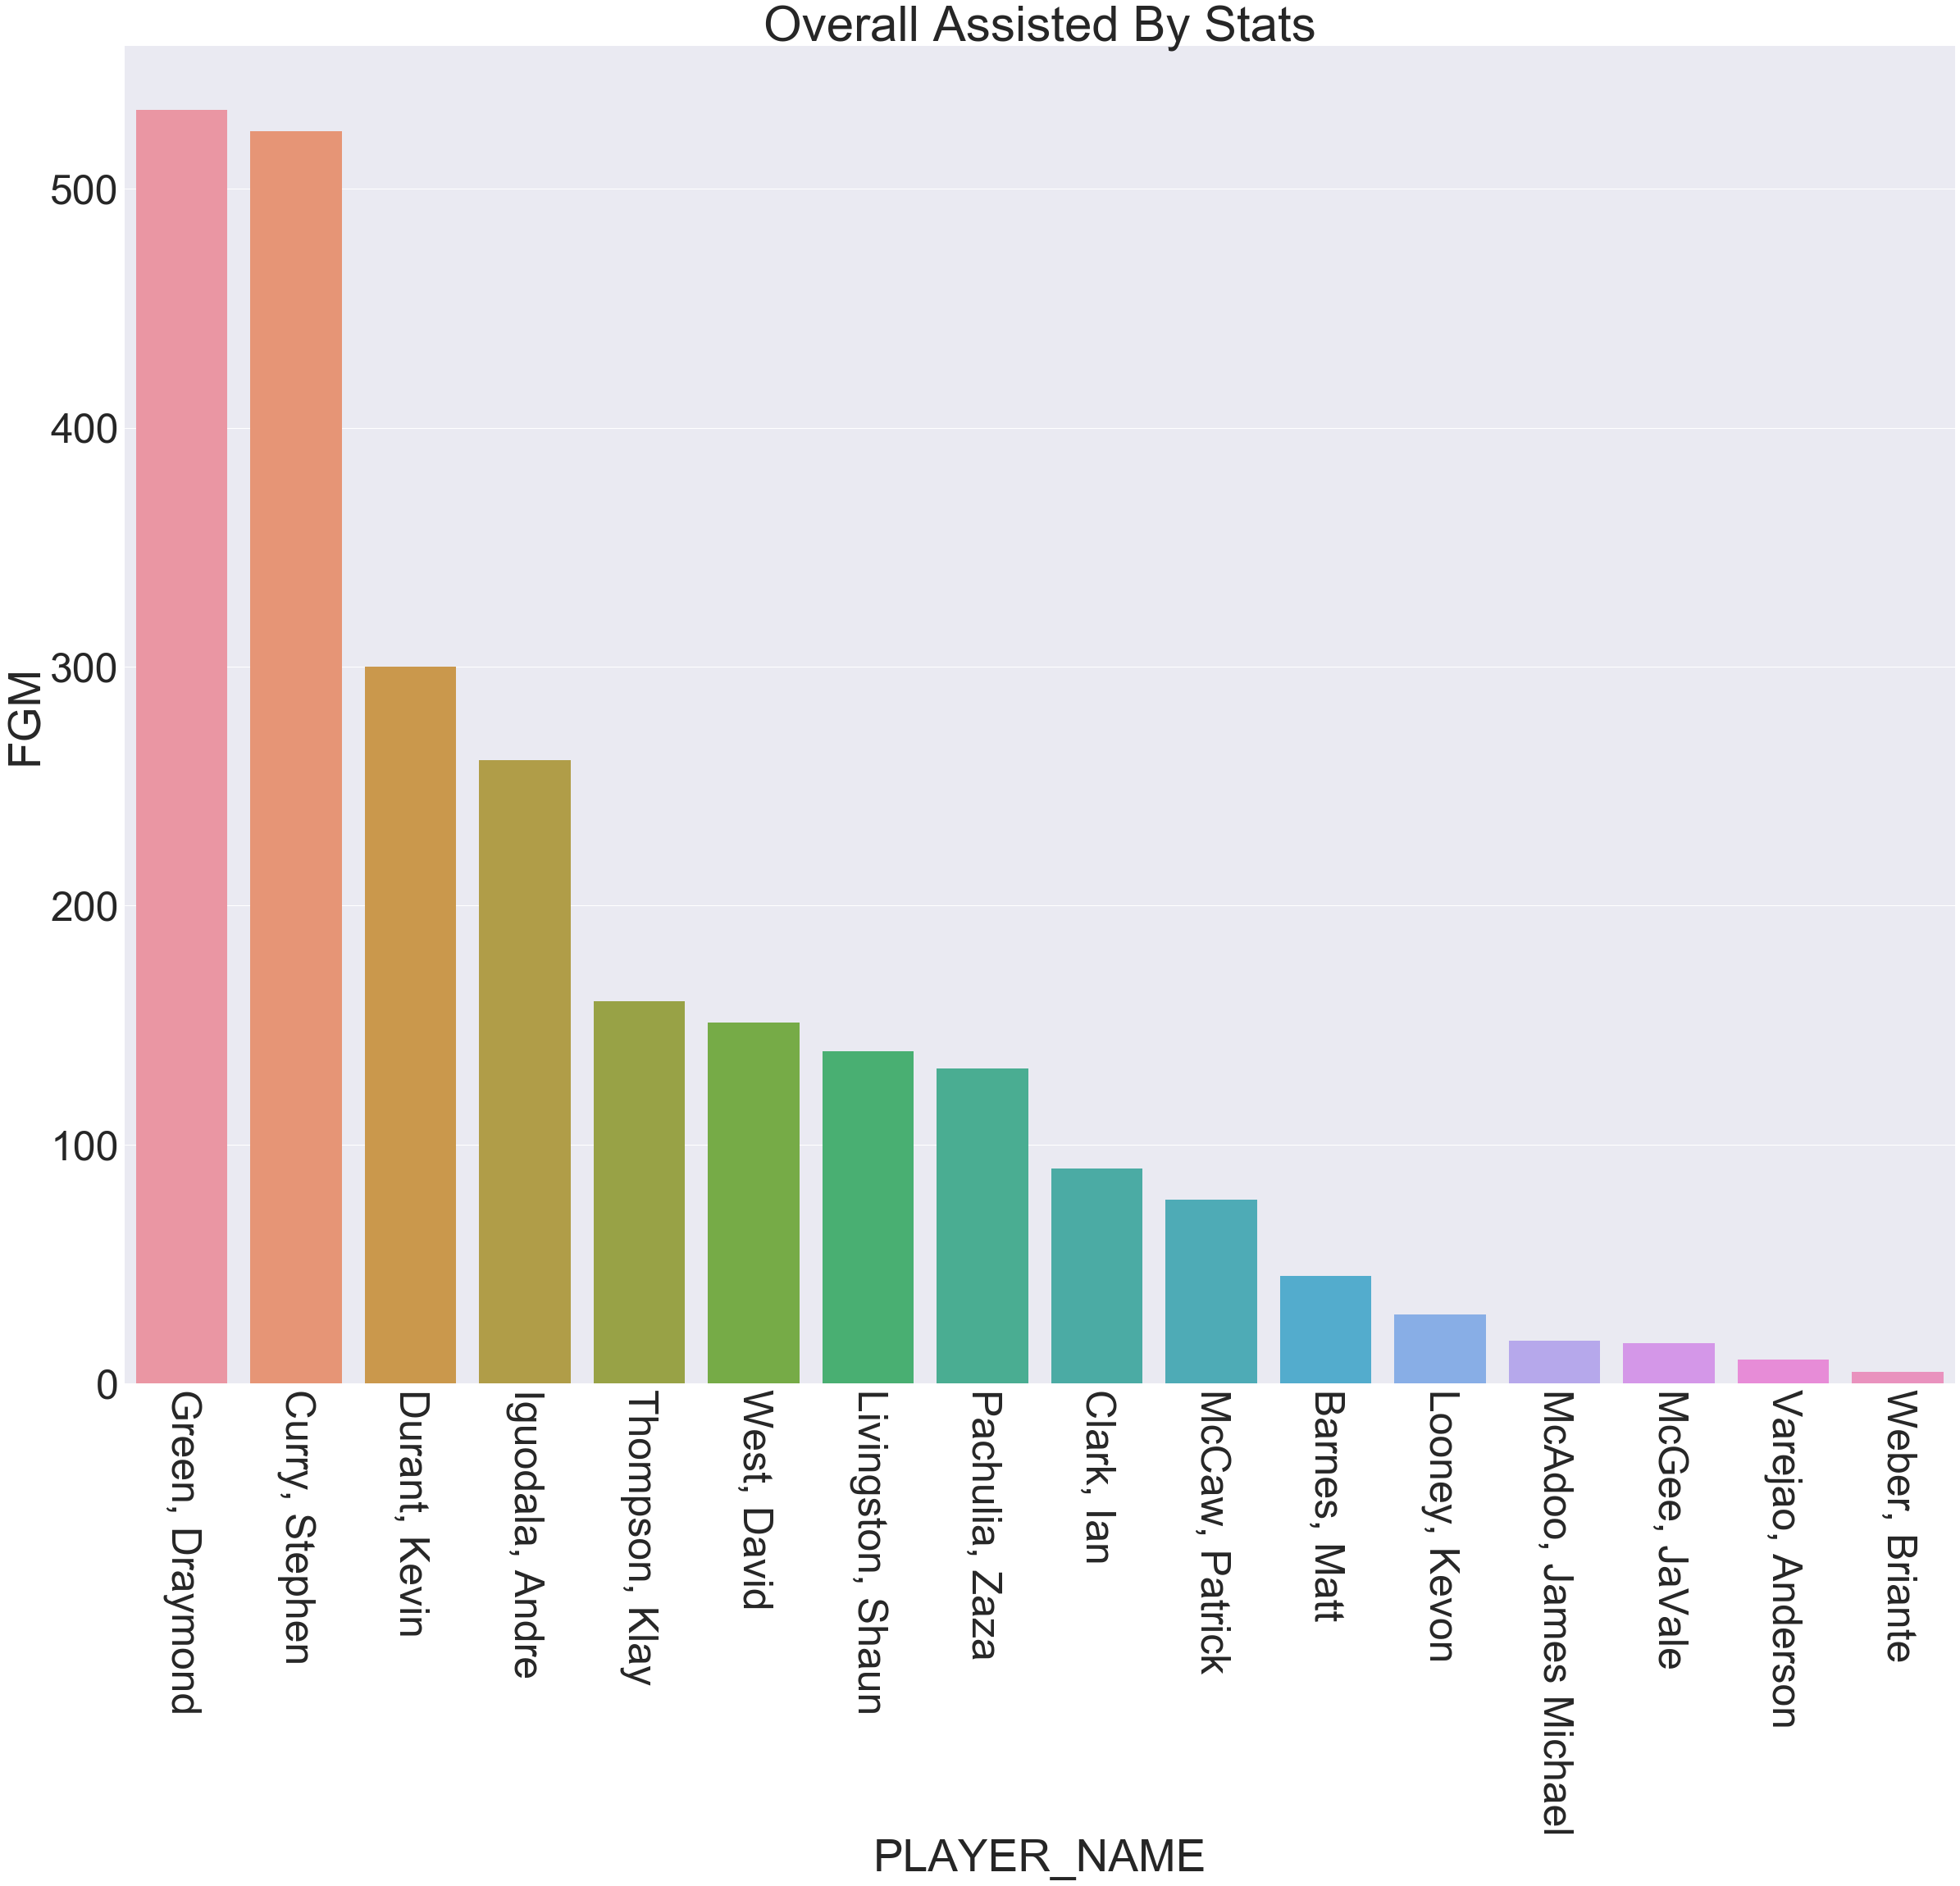

In [41]:
plt.rcParams['figure.figsize']=(40,30)
sns.set(font_scale=5)
plt.xticks(rotation=-90)
assist_overall = sns.barplot(x='PLAYER_NAME',y='FGM',data=test_assisted_by_df_sorted)
assist_overall.set_title('Overall Assisted By Stats')
#ax.set_title('Assisted By Stats', fontsize = 50)
#plt.rcParams["axes.labelsize"] = 100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

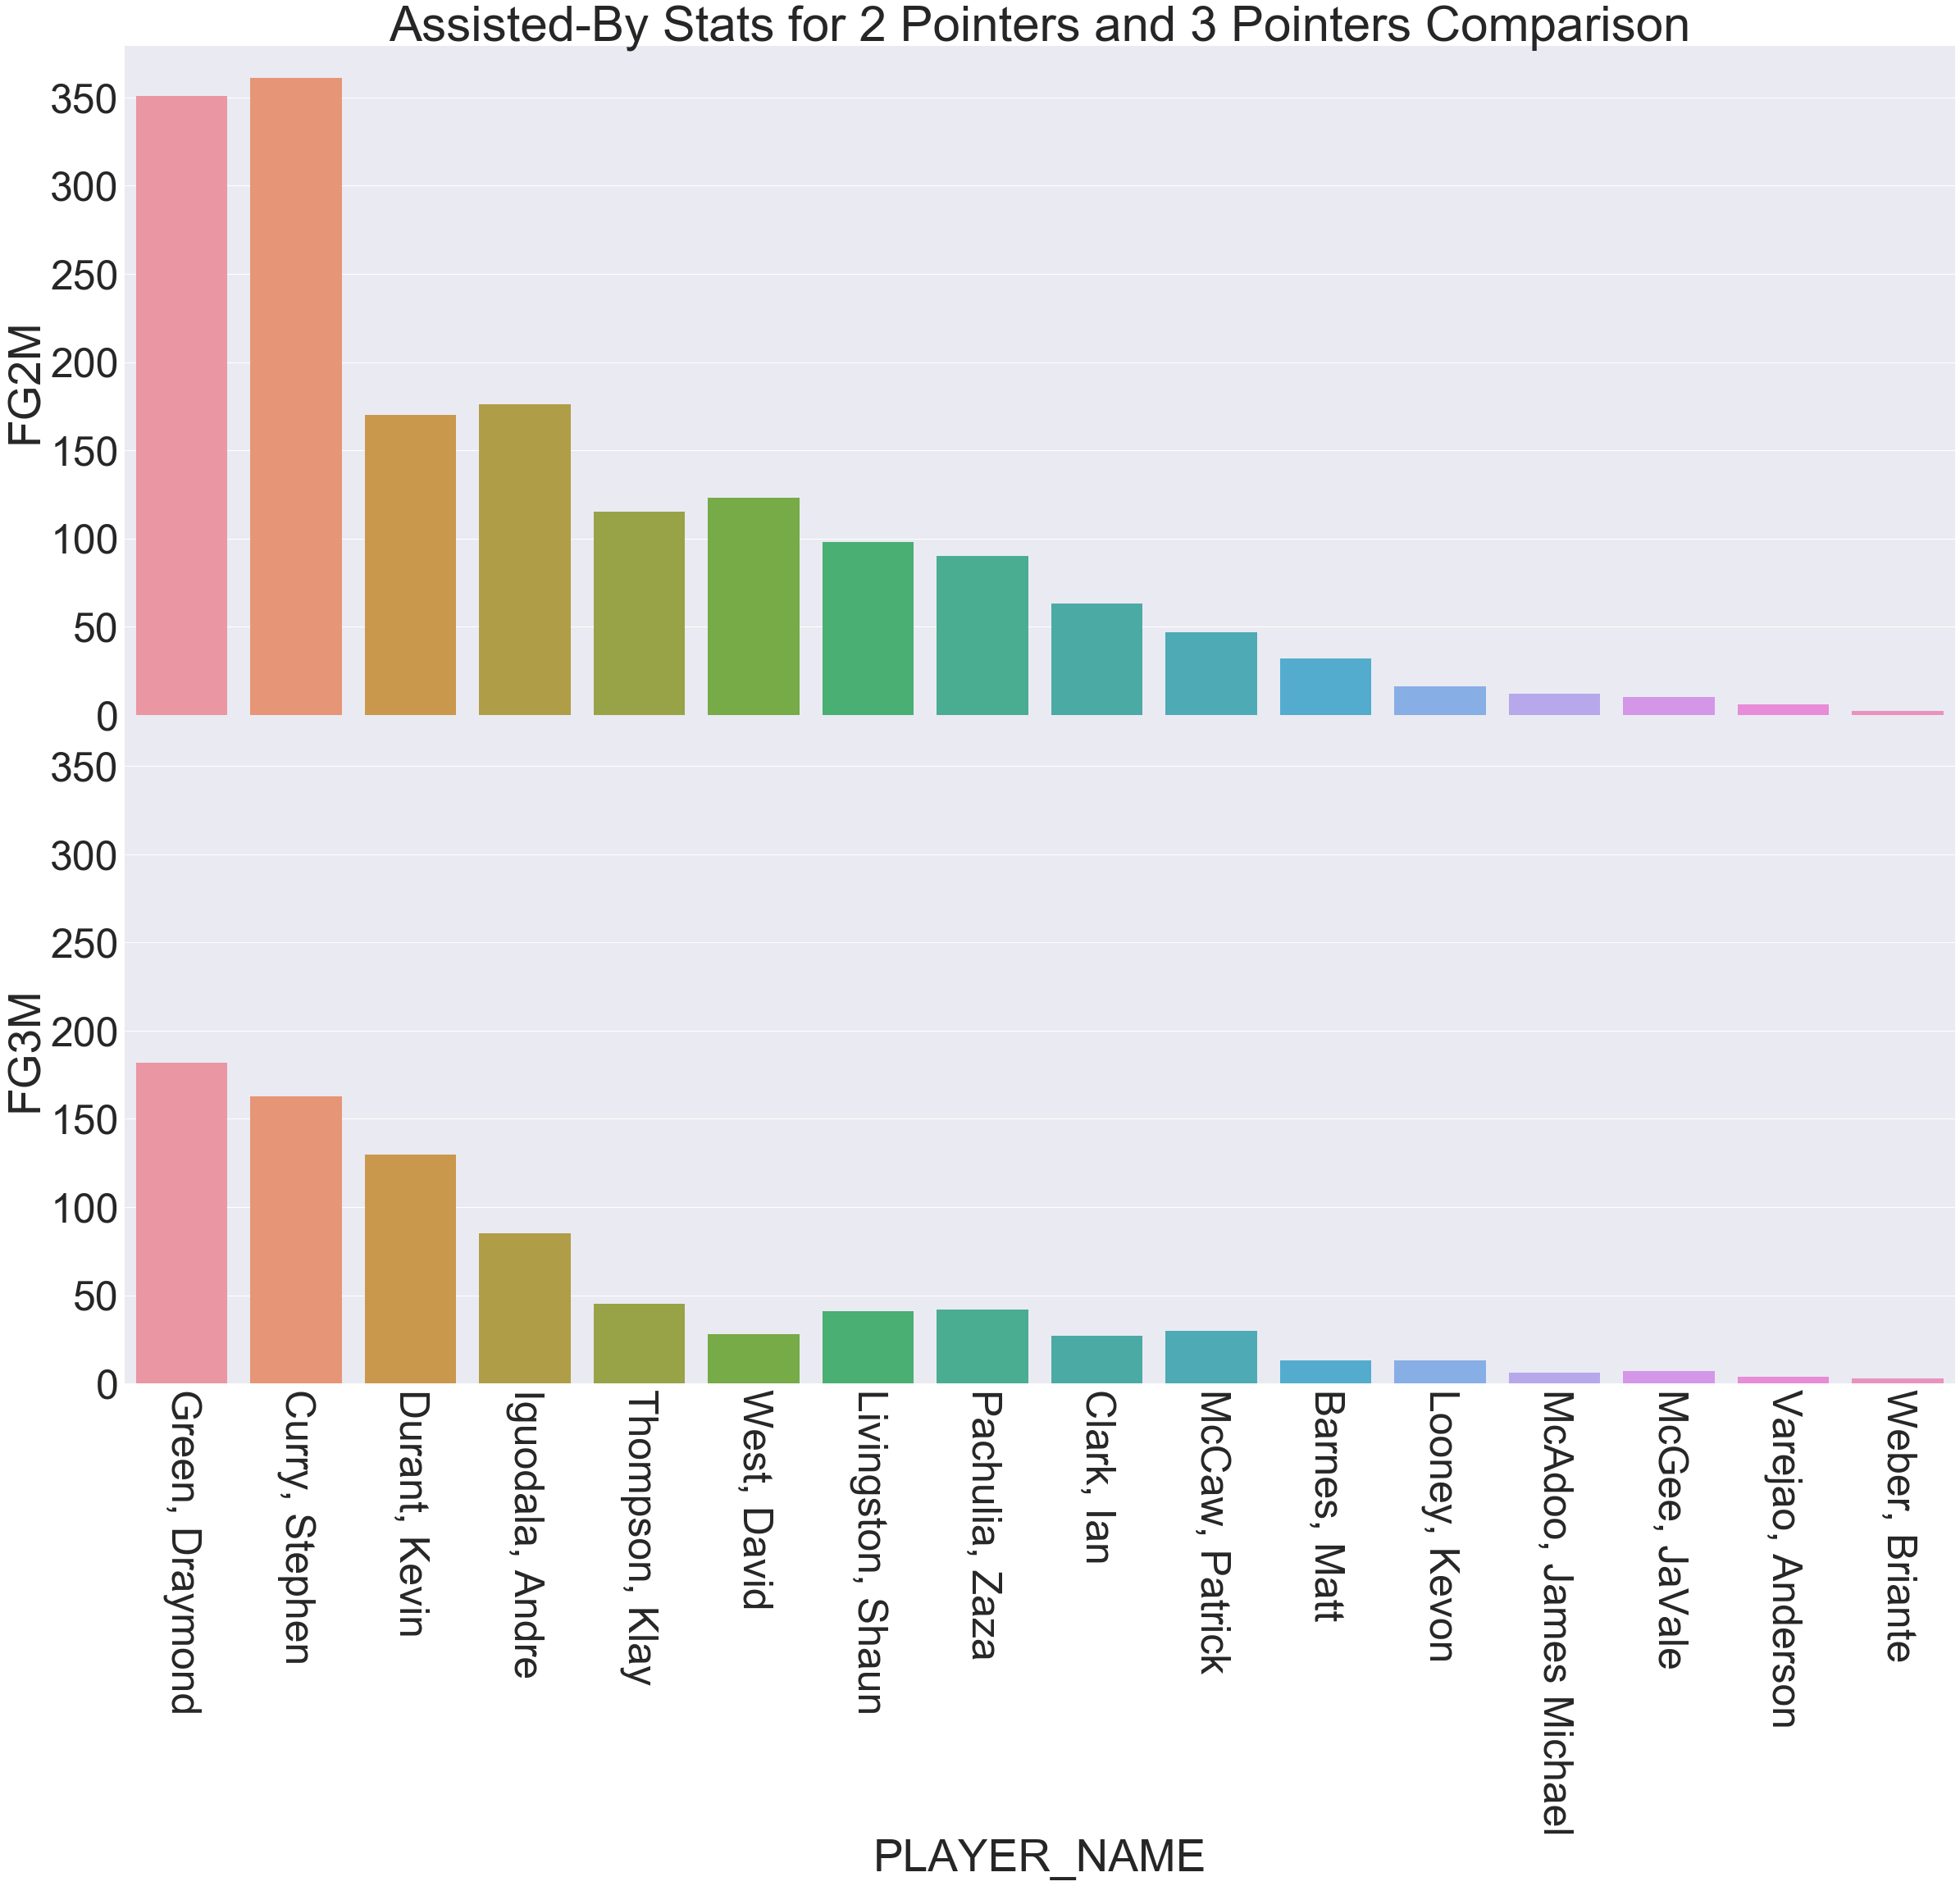

In [42]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
sns.barplot(x='PLAYER_NAME',y='FG2M',data=test_assisted_by_df_sorted, ax=ax1)
sns.barplot(x='PLAYER_NAME',y='FG3M',data=test_assisted_by_df_sorted, ax=ax2)
ax1.set_title('Assisted-By Stats for 2 Pointers and 3 Pointers Comparison')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xticks(rotation=-90)


In [43]:
test_assisted_by_df

,PLAYER_NAME,FGM,FG3M,FG2M
0,"Barnes, Matt",45,13,32
1,"Clark, Ian",90,27,63
2,"Curry, Stephen",524,163,361
3,"Durant, Kevin",300,130,170
4,"Green, Draymond",533,182,351
5,"Iguodala, Andre",261,85,176
6,"Livingston, Shaun",139,41,98
7,"Looney, Kevon",29,13,16
8,"McAdoo, James Michael",18,6,12
9,"McCaw, Patrick",77,30,47


In [44]:
startinglineup = ['Curry, Stephen', 'Green, Draymond', 'Durant, Kevin', 'Pachulia, Zaza', 'Thompson, Klay']
startinglineup_df = test_assisted_by_df[test_assisted_by_df['PLAYER_NAME'].isin(startinglineup)]

In [45]:
startinglineup_df

,PLAYER_NAME,FGM,FG3M,FG2M
2,"Curry, Stephen",524,163,361
3,"Durant, Kevin",300,130,170
4,"Green, Draymond",533,182,351
11,"Pachulia, Zaza",132,42,90
12,"Thompson, Klay",160,45,115


In [46]:
startinglineup_df.describe()

,FGM,FG3M,FG2M
count,5.000000,5.000000,5.000000
mean,329.800000,112.400000,217.400000
std,192.255559,65.599543,129.839516
min,132.000000,42.000000,90.000000
25%,160.000000,45.000000,115.000000
50%,300.000000,130.000000,170.000000
75%,524.000000,163.000000,351.000000
max,533.000000,182.000000,361.000000


In [47]:
test_assisted_by_df.describe()

,FGM,FG3M,FG2M
count,16.000000,16.000000,16.000000
mean,155.687500,51.187500,104.500000
std,169.656012,57.865613,113.276652
min,5.000000,3.000000,2.000000
25%,26.250000,11.500000,15.000000
50%,111.000000,29.000000,76.500000
75%,185.250000,55.000000,134.750000
max,533.000000,182.000000,361.000000


In [48]:
gsw_shot_area_df

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Area,Restricted Area,1559,2328,0.670,0,0,0.000,0.670,219,...,1,7,1,3,4,5,4,4,173,Restricted Area
1,Shot Area,In The Paint (Non-RA),353,807,0.437,0,0,0.000,0.437,58,...,6,6,3,1,4,5,6,2,173,In The Paint (Non-RA)
2,Shot Area,Mid-Range,638,1443,0.442,0,0,0.000,0.442,19,...,5,5,2,2,4,5,5,3,173,Mid-Range
3,Shot Area,Left Corner 3,111,258,0.430,111,258,0.430,0.645,2,...,2,2,4,4,1,4,1,7,173,Left Corner 3
4,Shot Area,Right Corner 3,114,289,0.394,114,289,0.394,0.592,3,...,3,3,4,4,2,3,2,6,173,Right Corner 3
5,Shot Area,Above the Break 3,755,1983,0.381,755,1983,0.381,0.571,12,...,4,4,4,4,3,2,3,5,173,Above the Break 3
6,Shot Area,Backcourt,1,31,0.032,1,31,0.032,0.048,0,...,7,1,4,4,4,1,7,1,173,Backcourt
